In [1]:
#basic imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
sns.set()
import os
import sys
import tomotopy as tp
import os
import re
import pyLDAvis
import seaborn as sns
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
       # print(os.path.join(dirname, filename))
#print(os.walk('/kaggle/input'))

In [2]:
def get_all_files_in_directory(directory):
    file_paths = []
    timestamps = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                file_paths.append(os.path.join(root, file))
                timestamp = os.path.basename(root)
                timestamps.append(timestamp)
    return file_paths, timestamps
    
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    stop_words = set(["a", "an", "the", "and", "or", "but", "if", "on", "in", "to", "is", "of", "for"])
    words = [word for word in re.split(r'(\s+)', text) if word.strip() and (word in {'\n', '<br>', '<p>'} or (len(word) > 2 and word not in stop_words))]
    processed_text = ' '.join(words)
    return processed_text

In [3]:
import os
import re
import pandas as pd
import numpy as np
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

#main_directory_path = '/kaggle/input/psb-conference-papers/Main Bodies/Main Bodies/'
main_directory_path = './PSB_Papers/main_body'

print('get files')

file_paths, timestamps = get_all_files_in_directory(main_directory_path)


c:\Users\leahz\anaconda3\envs\AIR\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\leahz\anaconda3\envs\AIR\Lib\site-packages\huggingface_hub\inference\_text_generation.py:121: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.7/migration/
  @validator("best_of")
c:\Users\leahz\anaconda3\envs\AIR\Lib\site-packages\huggingface_hub\inference\_text_generation.py:140: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for mo

get files


In [4]:
texts = []
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        processed_text = preprocess_text(text)
        texts.append(processed_text)

timestamps = pd.to_datetime(timestamps, errors='coerce')


In [5]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

In [6]:
topics, probs = topic_model.fit_transform(texts)#, batch_embeddings)

2024-07-19 16:12:41,436 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 37/37 [00:06<00:00,  5.82it/s]
2024-07-19 16:12:49,210 - BERTopic - Embedding - Completed ✓
2024-07-19 16:12:49,212 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-19 16:13:07,812 - BERTopic - Dimensionality - Completed ✓
2024-07-19 16:13:07,814 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-07-19 16:13:07,971 - BERTopic - Cluster - Completed ✓
2024-07-19 16:13:07,978 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-19 16:13:11,071 - BERTopic - Representation - Completed ✓


In [7]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,175,-1_set_using_gene_genes,"[set, using, gene, genes, used, one, also, num...",[simultaneous measurements expression levels t...
1,0,163,0_protein_proteins_structure_residues,"[protein, proteins, structure, residues, seque...",[many important sci tic medical industrial pro...
2,1,153,1_snps_snp_disease_genetic,"[snps, snp, disease, genetic, plo, population,...",[genome wide association studies was last five...
3,2,133,2_terms_gene_information_ontology,"[terms, gene, information, ontology, text, sys...",[nature textual biomedical information biomedi...
4,3,98,3_gene_genes_expression_regulatory,"[gene, genes, expression, regulatory, network,...",[information derived genome sequencing project...


In [8]:
topic_model.get_topic(3)

[('gene', 0.032343169772482874),
 ('genes', 0.02985807426665021),
 ('expression', 0.027655820942334947),
 ('regulatory', 0.015680129092648064),
 ('network', 0.015411981659544912),
 ('transcription', 0.015137049997371615),
 ('set', 0.014532279695301053),
 ('motif', 0.013627545102931762),
 ('cell', 0.013557749103311303),
 ('binding', 0.0130459227038583)]

In [9]:
topic_model.topic_labels_

{-1: '-1_set_using_gene_genes',
 0: '0_protein_proteins_structure_residues',
 1: '1_snps_snp_disease_genetic',
 2: '2_terms_gene_information_ontology',
 3: '3_gene_genes_expression_regulatory',
 4: '4_cancer_genes_gene_mutations',
 5: '5_patient_patients_health_clinical',
 6: '6_network_networks_time_graph',
 7: '7_tree_trees_taxa_species',
 8: '8_drug_drugs_target_similarity',
 9: '9_imaging_brain_features_age',
 10: '10_sequence_coding_dna_domain',
 11: '11_virus_hiv_viral_cov',
 12: '12_cell_cells_immune_spatial',
 13: '13_drug_harm_gene_relationships',
 14: '14_rac_species_rrna_biome',
 15: '15_cancer_features_mirna_set',
 16: '16_rna_rnas_structure_secondary',
 17: '17_mass_peptide_spectra_peak',
 18: '18_alignment_alignments_sequences_scoring'}

In [10]:
topic_model.topics_[:10]

[0, 0, 2, 7, -1, 16, 0, 0, 0, 10]

In [11]:
topic_model.visualize_topics()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'protein | proteins | structure | residues | sequence', 163],
                                   [1, 'snps | snp | disease | genetic | plo', 153],
                                   [2, 'terms | gene | information | ontology | text', 133],
                                   [3, 'gene | genes | expression | regulatory | network', 98],
                                   [4, 'cancer | genes | gene | mutations | expression', 72],
                                   [5, 'patient | patients | health | clinical | medical', 66],
                                   [6, 'network | networks | time | graph | state', 62],
                                   [7, 'tree | trees | taxa | species | number', 42],
                                   [8, 'drug | drugs | target | similarity | compounds', 31],
                                   [9, 'imaging | brain | features | age | subjects', 30],
                                   [10, 'sequence | coding | dna | domain | reads', 28],
                                   [11, 'virus | hiv | viral | cov | human', 20],
                                   [12, 'cell | cells | immune | spatial | expression', 18],
                                   [13, 'drug | harm | gene | relationships | drugs', 16],
                                   [14, 'rac | species | rrna | biome | communities', 16],
                                   [15, 'cancer | features | mirna | set | samples', 15],
                                   [16, 'rna | rnas | structure | secondary | alignments', 13],
                                   [17, 'mass | peptide | spectra | peak | peaks', 12],
                                   [18, 'alignment | alignments | sequences | scoring | score', 11]],
                                  dtype=object),
              'hovertemplate': '<b>Topic %{customdata[0]}</b><br>%{customdata[1]}<br>Size: %{customdata[2]}',
              'legendgroup': '',
              'marker': {'color': '#B0BEC5',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': array([163, 153, 133,  98,  72,  66,  62,  42,  31,  30,  28,  20,  18,  16,
                                         16,  15,  13,  12,  11], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 0.101875,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([14.029476 ,  7.6122284, 16.818829 , 15.21578  ,  5.6041365,  7.0244856,
                          14.65986  , 16.378605 ,  7.1717815,  6.9317675, 16.60494  , 13.695428 ,
                           5.71196  ,  7.2836595, 16.990725 ,  5.373337 , 16.222383 , 13.363501 ,
                          16.92377  ], dtype=float32),
              'xaxis': 'x',
              'y': array([15.063531 ,  8.225445 , 15.242898 , 14.701218 , -3.612459 ,  8.0025835,
                          14.796545 , 14.506817 ,  8.75355  ,  7.608454 , 14.652881 , 14.826446 ,
                          -3.5041652,  8.490631 , 15.479057 , -3.8456306, 15.024368 , 14.597377 ,
                          14.510849 ], dtype=float32),
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'D1',
                                'x': 4.5673362731933596,
                                'y': 6.689220333099365,
                                'yshift': 10},
                               {'showarrow': False,
                                'text': 'D2',
                                'x': 12.053334760665892,
                                'xshift': 10,
                                'y': 17.800915908813476}],
               'height': 650,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'itemsizing': 'consta

In [12]:
probs[200].shape

(19,)

In [13]:
topic_model.visualize_distribution(probs[200])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': '#C8D2D7', 'line': {'color': '#6E8484', 'width': 1}},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.02290168432218229, 0.021572932490814763, 0.5504721539109365,
                    0.020613513283277107, 0.018409244933454652,
                    0.033292456401993985, 0.029027676331233862,
                    0.019773119742597083, 0.03142015729165426, 0.02330973274682995,
                    0.02981845548125825, 0.01922686250240618, 0.023761418663061834,
                    0.03786805090825524, 0.028515126543084766,
                    0.028552413931474046, 0.020288261901434585,
                    0.018953321700514083, 0.02222341691353656],
              'y': [<b>Topic 0</b>: protein_proteins_structu..., <b>Topic 1</b>:
                    snps_snp_disease_genetic..., <b>Topic 2</b>:
                    terms_gene_information_o..., <b>Topic 3</b>:
                    gene_genes_expression_re..., <b>Topic 4</b>:
                    cancer_genes_gene_mutati..., <b>Topic 5</b>:
                    patient_patients_health_..., <b>Topic 6</b>:
                    network_networks_time_gr..., <b>Topic 7</b>:
                    tree_trees_taxa_species_..., <b>Topic 8</b>:
                    drug_drugs_target_simila..., <b>Topic 9</b>:
                    imaging_brain_features_a..., <b>Topic 10</b>:
                    sequence_coding_dna_dom..., <b>Topic 11</b>:
                    virus_hiv_viral_cov_hum..., <b>Topic 12</b>:
                    cell_cells_immune_spati..., <b>Topic 13</b>:
                    drug_harm_gene_relation..., <b>Topic 14</b>:
                    rac_species_rrna_biome_..., <b>Topic 15</b>:
                    cancer_features_mirna_s..., <b>Topic 16</b>:
                    rna_rnas_structure_seco..., <b>Topic 17</b>:
                    mass_peptide_spectra_pe..., <b>Topic 18</b>:
                    alignment_alignments_se...]}],
    'layout': {'height': 600,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'template': '...',
               'title': {'font': {'color': 'Black', 'size': 22},
                         'text': '<b>Topic Probability Distribution</b>',
                         'x': 0.5,
                         'xanchor': 'center',
                         'y': 0.95,
                         'yanchor': 'top'},
               'width': 800,
               'xaxis': {'title': {'text': 'Probability'}}}
})

In [14]:
topic_model.visualize_hierarchy(top_n_topics=50)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.42271681, 0.42271681, 0.        ]),
              'xaxis': 'x',
              'y': array([ -5.,  -5., -15., -15.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.37614265, 0.37614265, 0.        ]),
              'xaxis': 'x',
              'y': array([-25., -25., -35., -35.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.37614265, 0.41419568, 0.41419568, 0.        ]),
              'xaxis': 'x',
              'y': array([-30., -30., -45., -45.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.31208664, 0.31208664, 0.        ]),
              'xaxis': 'x',
              'y': array([-55., -55., -65., -65.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.31208664, 0.4452993 , 0.4452993 , 0.        ]),
              'xaxis': 'x',
              'y': array([-60., -60., -75., -75.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.41419568, 0.65180894, 0.65180894, 0.4452993 ]),
              'xaxis': 'x',
              'y': array([-37.5, -37.5, -67.5, -67.5]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.42271681, 0.73308705, 0.73308705, 0.65180894]),
              'xaxis': 'x',
              'y': array([-10. , -10. , -52.5, -52.5]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.60813813, 0.60813813, 0.        ]),
              'xaxis': 'x',
              'y': array([-85., -85., -95., -95.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.37844954, 0.37844954, 0.        ]),
              'xaxis': 'x',
              'y': array([-105., -105., -115., -115.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.26125711, 0.26125711, 0.        ]),
              'xaxis': 'x',
              'y': array([-125., -125., -135., -135.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.26125711, 0.41402352, 0.41402352, 0.        ]),
              'xaxis': 'x',
              'y': array([-130., -130., -145., -145.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.37844954, 0.52611705, 0.52611705, 0.41402352]),
              'xaxis': 'x',
 

In [11]:
topic_model.visualize_barchart(top_n_topics=10)

In [15]:
topic_model.visualize_heatmap(n_clusters=10, width=1000, height=1000)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>Similarity Score: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': [0_protein_proteins_structure, 3_gene_genes_expression,
                    6_network_networks_time, 1_snps_snp_disease,
                    2_terms_gene_information, 14_rac_species_rrna,
                    4_cancer_genes_gene, 12_cell_cells_immune,
                    15_cancer_features_mirna, 5_patient_patients_health,
                    9_imaging_brain_features, 7_tree_trees_taxa,
                    18_alignment_alignments_seq..., 8_drug_drugs_target,
                    13_drug_harm_gene, 10_sequence_coding_dna, 11_virus_hiv_viral,
                    16_rna_rnas_structure, 17_mass_peptide_spectra],
              'xaxis': 'x',
              'y': [0_protein_proteins_structure, 3_gene_genes_expression,
                    6_network_networks_time, 1_snps_snp_disease,
                    2_terms_gene_information, 14_rac_species_rrna,
                    4_cancer_genes_gene, 12_cell_cells_immune,
                    15_cancer_features_mirna, 5_patient_patients_health,
                    9_imaging_brain_features, 7_tree_trees_taxa,
                    18_alignment_alignments_seq..., 8_drug_drugs_target,
                    13_drug_harm_gene, 10_sequence_coding_dna, 11_virus_hiv_viral,
                    16_rna_rnas_structure, 17_mass_peptide_spectra],
              'yaxis': 'y',
              'z': array([[1.0000001 , 0.80090797, 0.81436396, ..., 0.750317  , 0.7596403 ,
                           0.78168094],
                          [0.80090797, 1.0000002 , 0.8643302 , ..., 0.7308327 , 0.76863694,
                           0.6556399 ],
                          [0.81436396, 0.8643302 , 1.0000001 , ..., 0.71952605, 0.64106596,
                           0.63963026],
                          ...,
                          [0.750317  , 0.7308327 , 0.71952605, ..., 1.        , 0.7158214 ,
                           0.6428919 ],
                          [0.7596403 , 0.76863694, 0.64106596, ..., 0.7158214 , 1.0000002 ,
                           0.5580512 ],
                          [0.78168094, 0.6556399 , 0.63963026, ..., 0.6428919 , 0.5580512 ,
                           1.        ]], dtype=float32)}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Similarity Score'}},
                             'colorscale': [[0.0, 'rgb(247,252,240)'], [0.125,
                                            'rgb(224,243,219)'], [0.25,
                                            'rgb(204,235,197)'], [0.375,
                                            'rgb(168,221,181)'], [0.5,
                                            'rgb(123,204,196)'], [0.625,
                                            'rgb(78,179,211)'], [0.75,
                                            'rgb(43,140,190)'], [0.875,
                                            'rgb(8,104,172)'], [1.0,
                                            'rgb(8,64,129)']]},
               'height': 1000,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'title': {'text': 'Trend'}},
               'margin': {'t': 60},
               'showlegend': True,
               'template': '...',
               'title': {'font': {'color': 'Black', 'size': 22},
                         'text': '<b>Similarity Matrix</b>',
                         'x': 0.55,
                         'xanchor': 'center',
                         'y': 0.95,
                         'yanchor': 'top'},
               'width': 1000,
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.0], 'scaleanchor': 'y'},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'constrain': 'domain', 'domain': [0.0, 1.0]}}
})

In [16]:
topic_model.visualize_term_rank()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertext': '<b>Topic -1</b>:set_using_gene_genes_used_one_also',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.01286878, 0.01167411, 0.01086079, 0.01046659, 0.00995358, 0.00991386,
                          0.00936218, 0.00921498, 0.00915786, 0.00906887])},
             {'hovertext': '<b>Topic 0</b>:protein_proteins_structure_residues',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.03122966, 0.02456419, 0.0202108 , 0.01680181, 0.01670859, 0.01470082,
                          0.01373451, 0.01361377, 0.01255504, 0.01233201])},
             {'hovertext': '<b>Topic 1</b>:snps_snp_disease_genetic_plo_popula',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.02757833, 0.02642718, 0.01836546, 0.01626029, 0.01588795, 0.01542837,
                          0.01500764, 0.01453664, 0.01430644, 0.01361525])},
             {'hovertext': '<b>Topic 2</b>:terms_gene_information_ontology_tex',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.02070308, 0.01571026, 0.01537521, 0.01530088, 0.01414486, 0.01244457,
                          0.0121163 , 0.01155435, 0.01101442, 0.01070214])},
             {'hovertext': '<b>Topic 3</b>:gene_genes_expression_regulatory_ne',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.03234317, 0.02985807, 0.02765582, 0.01568013, 0.01541198, 0.01513705,
                          0.01453228, 0.01362755, 0.01355775, 0.01304592])},
             {'hovertext': '<b>Topic 4</b>:cancer_genes_gene_mutations_express',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.03600852, 0.02563753, 0.02559487, 0.02055605, 0.02010412, 0.01943662,
                          0.01924245, 0.01915176, 0.01907444, 0.01842527])},
             {'hovertext': '<b>Topic 5</b>:patient_patients_health_clinical_me',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.02440909, 0.02330109, 0.01954151, 0.01640638, 0.01621741, 0.01584176,
                          0.01402246, 0.01323696, 0.01306555, 0.01275417])},
             {'hovertext': '<b>Topic 6</b>:network_networks_time_graph_state_t',
              'line': {'color': 'black', 'width': 1.5},
              'mode': 'lines+lines',
              'name': '',
              'opacity': 0.1,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([0.02730849, 0.02176604, 0.01604332, 0.01369238, 0.01366652, 0.01322647,
                    

In [8]:
def normalize_scores(scores):
    min_score = np.min(scores)
    max_score = np.max(scores)
    normalized_scores = (scores - min_score) / (max_score - min_score)
    return normalized_scores

def calculate_relevance(topic_term_dists, term_freqs, lambda_param=0.6):
    """Calculate relevance for each term in each topic."""
    topic_term_dists = np.array(topic_term_dists)
    term_freqs = np.array(term_freqs)
    term_freqs = term_freqs / term_freqs.sum()  # Normalize term frequencies
    relevance = lambda_param * np.log(topic_term_dists) + (1 - lambda_param) * np.log(topic_term_dists / term_freqs)
    normalized_relevance = normalize_scores(relevance)
    return normalized_relevance

def calculate_saliency(topic_term_dists, term_freqs):
    term_freqs = np.array(term_freqs)
    term_freqs = term_freqs / term_freqs.sum()  # Normalize term frequencies

    num_topics, num_terms = topic_term_dists.shape
    saliency = np.zeros_like(topic_term_dists)
    for k in range(num_topics):  # For each topic
        for w in range(num_terms):  # For each word in the vocabulary
            p_word_given_topic = topic_term_dists[k, w]
            p_word_in_corpus = term_freqs[w]
            saliency[k, w] += p_word_given_topic * np.log(p_word_given_topic / p_word_in_corpus)
    normalized_saliency = normalize_scores(saliency)
    return normalized_saliency


In [20]:
print(topic_model.c_tf_idf_)

  (0, 30727)	9.839426461104124e-05
  (0, 30723)	3.5775403889701295e-05
  (0, 30720)	6.340961723683458e-05
  (0, 30719)	6.89158238210416e-05
  (0, 30718)	3.1270938406137014e-05
  (0, 30717)	0.00021621768647643662
  (0, 30715)	3.5775403889701295e-05
  (0, 30713)	7.155080777940259e-05
  (0, 30712)	3.279808820368041e-05
  (0, 30711)	0.00012094494016900713
  (0, 30710)	0.0004618709709032334
  (0, 30706)	0.00014400255981186053
  (0, 30703)	0.00012681923447366915
  (0, 30701)	3.1270938406137014e-05
  (0, 30693)	3.802769036824134e-05
  (0, 30690)	3.220567916907191e-05
  (0, 30689)	5.208417686048142e-05
  (0, 30684)	0.0002831278785276983
  (0, 30682)	8.908038905150387e-05
  (0, 30681)	9.126576345752195e-05
  (0, 30673)	5.513783178639285e-05
  (0, 30672)	2.9693463017167953e-05
  (0, 30669)	3.352314428004008e-05
  (0, 30668)	0.00030050781545899036
  (0, 30664)	7.089725378468604e-05
  :	:
  (18, 192)	0.0003462245792421116
  (18, 186)	0.0007744562917397333
  (18, 185)	0.001025535442323763
  (18, 18

In [19]:
print(topic_model.vectorizer_model.get_feature_names_out()[:20])

['aaa' 'aab' 'aac' 'aach' 'aad' 'aaf' 'aami' 'aang' 'aap' 'aar' 'aaron'
 'aau' 'aave' 'aba' 'ababa' 'abaca' 'abalone' 'abandon' 'abandoned'
 'abandoning']


In [9]:
print(topics)

[0, 0, 2, 7, -1, 12, 0, 0, 0, 0, 2, 3, 2, 0, 6, 0, 0, 0, 0, -1, 0, 2, 0, 0, 0, 7, 0, 0, 6, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, -1, 0, 6, 3, 0, 0, 0, 17, 0, 3, -1, 3, 2, 0, -1, -1, 2, 2, 0, 0, 3, 3, 3, 0, 0, -1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 3, 6, 6, 6, -1, -1, 2, 2, 2, 0, 2, -1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 6, -1, -1, 0, 17, 10, 3, 0, 0, 12, 0, 6, 3, 6, 0, 0, 0, 17, 4, 7, 0, -1, 0, -1, -1, 2, -1, 0, 8, 8, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, -1, -1, 0, 6, 3, 7, 0, 0, -1, 0, 0, -1, 2, 0, 7, 7, -1, 0, 3, 3, 6, -1, 6, -1, 1, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 2, -1, 0, 0, -1, 0, 17, 0, 1, 1, 1, 1, 1, -1, 0, 17, -1, 1, 1, 1, 1, 1, -1, 0, 0, 0, 3, 3, 3, 7, 17, -1, 7, 10, 0, 1, 6, 0, 0, 7, 3, 0, 0, 3, 0, 3, 0, 2, 2, 2, 3, 6, 3, 6, -1, 2, 3, 3, -1, 10, 7, 7, 7, 7, 10, 7, -1, -1, 10, 7, 7, 7, 7, 10, 7, 0, 0, 0, 3, 3, 3, 0, 7, -1, 3, 3, 1, 7, -1, 3, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 6, 0, 3, 3, 2, 3, 3, 7, 7, 0, 0, -1, 17, 0

In [14]:
from collections import Counter
for topic in topic_model.get_topics():
    word_count = Counter(word for word, _ in topic)
    print(word_count)

TypeError: 'int' object is not iterable

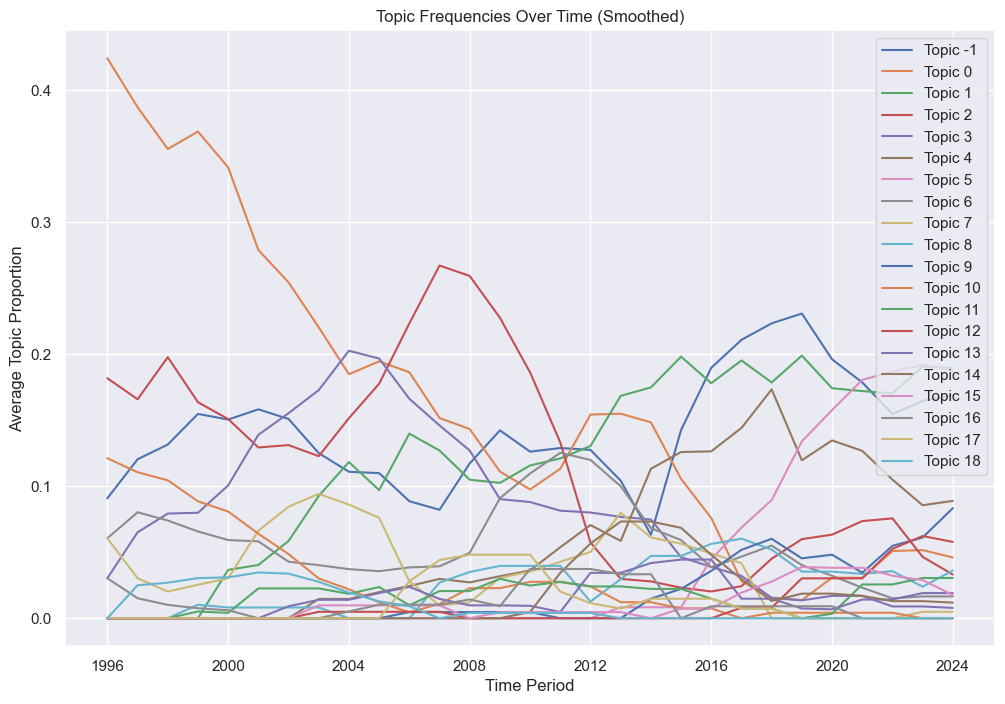

In [20]:
import matplotlib.pyplot as plt
df = pd.DataFrame({"Text": texts, "Timestamp": timestamps, "Topic": topics})

topic_over_time = df.groupby(['Timestamp', 'Topic']).size().unstack(fill_value=0)
topic_over_time = topic_over_time.div(topic_over_time.sum(axis=1), axis=0)

topic_over_time = topic_over_time.sort_index()

topic_over_time_smooth = topic_over_time.rolling(window=5, min_periods=1).mean()
plt.figure(figsize=(12, 8))
for topic in topic_over_time_smooth.columns:
    plt.plot(topic_over_time_smooth.index, topic_over_time_smooth[topic], label=f'Topic {topic}')
plt.xlabel('Time Period')
plt.ylabel('Average Topic Proportion')
plt.title('Topic Frequencies Over Time (Smoothed)')
plt.legend()
plt.show()